In [2]:
import pandas as pd

# Baseline MLP Multiclass Classification Experiment

In [3]:
PATH = "../../my_data/identification-dataset/my_custom_data/big-identification-dataset.csv"
df = pd.read_csv(PATH)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160260 entries, 0 to 160259
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tdoa           160260 non-null  float64
 1   snr_an         160260 non-null  float64
 2   power_dif      160213 non-null  float64
 3   rx_snr         119746 non-null  float64
 4   rx_powerdif    119744 non-null  float64
 5   tof            119746 non-null  float64
 6   material       160260 non-null  object 
 7   NLOS_material  160260 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,tdoa,snr_an,power_dif,rx_snr,rx_powerdif,tof,material,NLOS_material
0,-0.211129,145.678574,10.307022,215.300003,11.049919,5.009119,cardboard,1
1,-0.197054,134.321426,10.824654,192.000000,11.397888,5.027886,cardboard,1
2,-0.197054,134.321426,10.824654,236.149994,9.844360,5.065420,cardboard,1
3,-0.248663,104.107140,11.064209,236.149994,9.844360,5.065420,cardboard,1
4,-0.182979,113.250000,10.954155,185.000000,10.330307,5.027886,cardboard,1


In [7]:
df.describe()

,tdoa,snr_an,power_dif,rx_snr,rx_powerdif,tof,NLOS_material
count,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000,119744.000000
mean,-0.009004,120.834692,12.863304,198.813199,11.032414,5.043572,1.750142
std,1.558409,39.876752,3.804028,31.198740,1.248188,0.022086,2.126004
min,-373.351807,6.208333,-17.027435,0.118671,-35.275032,4.952817,0.000000
25%,-0.211129,109.718750,11.155712,177.791672,10.306816,5.027886,0.000000
50%,-0.009384,127.750000,12.243141,198.449997,10.761261,5.041961,1.000000
75%,0.211129,144.041672,12.946575,222.399994,11.368462,5.056036,4.000000
max,4.077143,326.200012,32.832855,330.000000,36.156631,5.145180,6.000000


In [8]:
df['NLOS_material'].unique()

array([1, 0, 2, 3, 4, 5, 6])

## Classification

In [9]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                         )

In [11]:
# Extracted features 
X = df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof']]
y = df['NLOS_material'] # Labels

In [12]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [13]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.56599866
Iteration 2, loss = 0.33849467
Iteration 3, loss = 0.31676718
Iteration 4, loss = 0.30566879
Iteration 5, loss = 0.30044711
Iteration 6, loss = 0.29630972
Iteration 7, loss = 0.29494215
Iteration 8, loss = 0.29293348
Iteration 9, loss = 0.29070312
Iteration 10, loss = 0.28826351
Iteration 11, loss = 0.28733285
Iteration 12, loss = 0.28751401
Iteration 13, loss = 0.28559889
Iteration 14, loss = 0.28505027
Iteration 15, loss = 0.28260905
Iteration 16, loss = 0.28335630
Iteration 17, loss = 0.28077891
Iteration 18, loss = 0.28104117
Iteration 19, loss = 0.28099356
Iteration 20, loss = 0.27990128
Iteration 21, loss = 0.27932206
Iteration 22, loss = 0.27831437
Iteration 23, loss = 0.27699341
Iteration 24, loss = 0.27676820
Iteration 25, loss = 0.27987264
Iteration 26, loss = 0.27522423
Iteration 27, loss = 0.27479572
Iteration 28, loss = 0.27339028
Iteration 29, loss = 0.27273623
Iteration 30, loss = 0.27240638
Iteration 31, loss = 0.27295919
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [14]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [15]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 86.68856474780091%


In [16]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred, average="macro") * 100}%')

Test Precision: 76.75364297422286%


In [17]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred, average="macro") * 100}%')

Test Recall: 77.23664103006249%


In [18]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred, average="macro" )}')

Test F1: 0.7689952563129354


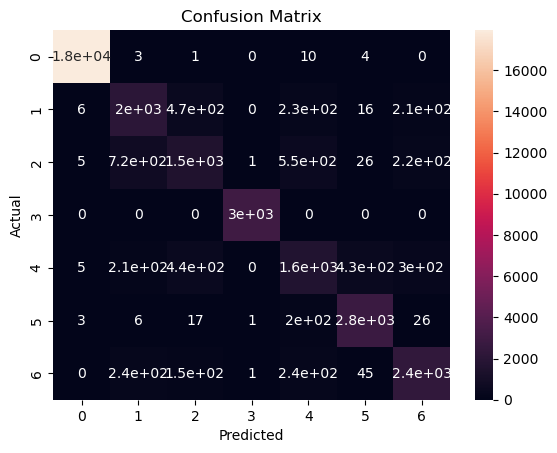

In [19]:
cm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
cm

array([[17947,     3,     1,     0,    10,     4,     0],
       [    6,  2035,   471,     0,   228,    16,   209],
       [    5,   721,  1483,     1,   550,    26,   222],
       [    0,     0,     0,  2966,     0,     0,     0],
       [    5,   209,   437,     0,  1586,   429,   302],
       [    3,     6,    17,     1,   197,  2772,    26],
       [    0,   240,   151,     1,   240,    45,  2353]])